# Import Data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline  

In [144]:
import sys
print(f"python version : {sys.version}")
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")

python version : 3.8.13 (default, Mar 28 2022, 11:38:47) 
[GCC 7.5.0]
numpy version: 1.19.5
pandas version: 1.4.2


In [54]:
train = pd.read_csv('./data/train.csv')
train.drop(['id'], axis=1, inplace=True)

test = pd.read_csv('./data/test.csv')
test.drop(['id'], axis=1, inplace=True)

In [55]:
train

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000
...,...,...,...,...,...,...,...,...,...,...
1010,Toyota Corolla,46768,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2014,5415000
1011,Toyota Camry,31600,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,Silver,2011,3615000
1012,Toyota Camry,96802,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2011,3415000
1013,Lexus GX 460,146275,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Gold,2013,14315000


In [56]:
print("--------------- train ---------------")
train.info()
print("\n\n--------------- test ---------------")
test.info()

--------------- train ---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1015 non-null   object
 1   odometer      1015 non-null   int64 
 2   location      1015 non-null   object
 3   isimported    1015 non-null   object
 4   engine        1015 non-null   object
 5   transmission  1015 non-null   object
 6   fuel          1015 non-null   object
 7   paint         1015 non-null   object
 8   year          1015 non-null   int64 
 9   target        1015 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 79.4+ KB


--------------- test ---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         436 non-null    object
 1   odometer      436 non-null

# 'Title' Column

In [57]:
sorted(train['title'].unique())

['ALPINA B3',
 'Acura MDX',
 'Acura RDX',
 'Acura TL',
 'Acura ZDX',
 'Audi S6',
 'BMW 325',
 'BMW 335',
 'BMW 528',
 'BMW 730',
 'BMW 740',
 'BMW 745',
 'BMW 750',
 'BMW X6',
 'Bentley Arnage',
 'Chevrolet Camaro',
 'Chevrolet Evanda',
 'Chevrolet Traverse',
 'DAF 45',
 'DAF 95XF TRACTOR HEAD',
 'DAF CF',
 'DAF FA 55. 180',
 'Dodge Charger',
 'Ford Edge',
 'Ford Escape',
 'Ford Expedition',
 'Ford Explorer',
 'Ford F 150',
 'Ford Focus',
 'Ford Fusion',
 'Ford Transit',
 'GAC Gonow Other',
 'GMC Terrain',
 'Honda Accord',
 'Honda CR-V',
 'Honda Civic',
 'Honda Crosstour',
 'Honda Element',
 'Honda Fit',
 'Honda Insight',
 'Honda Odyssey',
 'Honda Pilot',
 'Honda Ridgeline',
 'Hyundai Azera',
 'Hyundai Elantra',
 'Hyundai Santa Fe',
 'Hyundai Sonata',
 'Hyundai Tucson',
 'Hyundai ix35',
 'IVECO EUROTECH 7.50E-16',
 'IVM LT35',
 'Infiniti FX',
 'Infiniti JX',
 'Infiniti M35',
 'Infiniti QX80',
 'Isuzu CABSTER',
 'Isuzu NQR',
 'Iveco TRUCK',
 'JMC Vigus',
 'Jaguar X-Type',
 'Jaguar XJ8',

In [58]:
sorted(test['title'].unique())

['Acura MDX',
 'Acura RDX',
 'Acura TL',
 'Acura TSX',
 'BMW 525',
 'BMW 535',
 'BMW X3',
 'Chevrolet Camaro',
 'DAF XF TRACTOR HEAD',
 'Fiat Ducato',
 'Ford Edge',
 'Ford Explorer',
 'Ford F 150',
 'Ford Fusion',
 'Ford Mondeo',
 'Ford Mustang',
 'Ford TRANSIT PICKUP',
 'Ford Transit',
 'Honda Accord',
 'Honda CR-V',
 'Honda Civic',
 'Honda Crosstour',
 'Honda Element',
 'Honda Fit',
 'Honda Odyssey',
 'Honda Pilot',
 'Honda Ridgeline',
 'Hyundai Azera',
 'Hyundai Elantra',
 'Hyundai Santa Fe',
 'Hyundai Sonata',
 'Infiniti FX',
 'Iveco EUROCARGO 120e18',
 'Iveco TRUCK',
 'Jeep Wrangler',
 'Kia Optima',
 'Kia Rio',
 'Land Rover Discovery',
 'Land Rover Range Rover',
 'Land Rover Range Rover Sport',
 'Lexus ES 300',
 'Lexus ES 350',
 'Lexus GS 300',
 'Lexus GS 350',
 'Lexus GX 460',
 'Lexus GX 470',
 'Lexus IS 250',
 'Lexus LX 570',
 'Lexus RX 300',
 'Lexus RX 330',
 'Lexus RX 350',
 'Lexus RX 400',
 'MINI Cooper',
 'MINI Cooper Coupé',
 'Mack CXN613 CAB BEHIND ENGINE',
 'Mack R-686ST'

In [59]:
only_train_tt = set(train.title.unique())-set(test.title.unique())
only_test_tt = set(test.title.unique())-set(train.title.unique())

In [60]:
print('------------- only train -------------')
print(len(only_train_tt))
print(only_train_tt)

print('\n\n------------- only test -------------')
print(len(only_test_tt))
print(only_test_tt)

------------- only train -------------
116
{'Mercedes-Benz 450', 'Volkswagen T4 Caravelle', 'MINI Cooper Countryman', 'Volkswagen 17.22', 'Nissan Quest', 'Mercedes-Benz 200', 'Mack CH613', 'Man Diesel 19.314 FILT-N', 'Mercedes-Benz GL 450', 'GAC Gonow Other', 'Land Rover Range Rover Velar', 'Mazda CX-9', 'Mitsubishi Galant', 'BMW 740', 'Honda Insight', 'BMW 745', 'Infiniti QX80', 'Mercedes-Benz GLE 43 AMG', 'Mercedes-Benz/52', 'Toyota Prado', 'Volvo FH12', 'Isuzu NQR', 'Lexus LS 460', 'Kia Cerato', 'Mack CH613 CONVENTIONAL CAB', 'Nissan X-Trail', 'Peugeot 607', 'Nissan Versa', 'Toyota Dyna', 'Mercedes-Benz E 320', 'Bentley Arnage', 'GMC Terrain', 'BMW 335', 'Lincoln Mark', 'ALPINA B3', 'BMW 528', 'Mercedes-Benz C 450 AMG', 'Volkswagen Touareg', 'Porsche Macan', 'Jaguar X-Type', 'Mercedes-Benz E 550', 'Mercedes-Benz C 250', 'Kia Soul', 'Mercedes-Benz SL 400', 'Chevrolet Evanda', 'Acura ZDX', 'Scania TRACTOR HEAD', 'Mazda Tribute', 'Mercedes-Benz CLA 250', 'Kia Picanto', 'DAF FA 55. 180'

In [61]:
train['brand'] = train['title'].apply(lambda x:x.split()[0])
test['brand'] = test['title'].apply(lambda x:x.split()[0])

In [62]:
train = train.replace({
    'Mercedes-Benz/52' : 'Mercedes-Benz',
    })

In [63]:
train.head()

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000,Toyota
1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000,Toyota
2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000,Land
3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000,Lexus
4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000,Toyota


In [64]:
print('------------- train -------------')
print(train.brand.value_counts().head())

print('\n\n------------- test -------------')
print(test.brand.value_counts().head())

------------- train -------------
Toyota           474
Lexus            122
Mercedes-Benz    106
Honda             81
Ford              36
Name: brand, dtype: int64


------------- test -------------
Toyota           225
Lexus             54
Mercedes-Benz     42
Honda             34
Hyundai           11
Name: brand, dtype: int64


In [65]:
only_train_br = set(train.brand.unique())-set(test.brand.unique())
only_test_br = set(test.brand.unique())-set(train.brand.unique())

In [66]:
print('------------- only train -------------')
print(len(only_train_br))
print(only_train_br)

print('\n\n------------- only test -------------')
print(len(only_test_br))
print(only_test_br)

------------- only train -------------
14
{'GAC', 'Scania', 'Isuzu', 'GMC', 'Audi', 'Jaguar', 'MAN-VOLKSWAGEN', 'ALPINA', 'IVECO', 'IVM', 'JMC', 'Dodge', 'Bentley', 'Lincoln'}


------------- only test -------------
1
{'Fiat'}


In [67]:
brand_list = train[['brand', 'target']].groupby(['brand'], as_index=False).mean().sort_values(by='target', ascending=True,ignore_index=True)
brand_list

,brand,target
0,Audi,1.215000e+06
1,GAC,1.490000e+06
2,Nissan,1.926125e+06
3,Mazda,2.078750e+06
4,Peugeot,2.125000e+06
5,Volkswagen,2.266538e+06
6,Jeep,2.515000e+06
7,Jaguar,2.665000e+06
8,Kia,2.697667e+06
9,Pontiac,2.715000e+06


In [68]:
for i,br in enumerate(brand_list.brand):
    train = train.replace({
    br : 10*i,
    })
    
    test = test.replace({
    br : 10*i,
    'Fiat' : 0,
    })

### 브랜드의 등급? 을 살리고 싶어서, 따로 숫자를 준다음에 Numeric 데이터로 학습시켜 보았습니다.

In [69]:
train[['brand', 'target']].groupby(['brand'], as_index=False).mean().sort_values(by='target', ascending=True,ignore_index=True)

,brand,target
0,0,1.215000e+06
1,10,1.490000e+06
2,20,1.926125e+06
3,30,2.078750e+06
4,40,2.125000e+06
5,50,2.266538e+06
6,60,2.515000e+06
7,70,2.665000e+06
8,80,2.697667e+06
9,90,2.715000e+06


# 'location' Column

In [70]:
print('------------- train -------------')
print(sorted(train.location.unique()))

print('\n\n------------- test -------------')
print(sorted(test.location.unique()))


------------- train -------------
['Abia', 'Abia State', 'Abuja', 'Abuja ', 'Accra', 'Adamawa ', 'FCT', 'Lagos', 'Lagos ', 'Lagos State', 'Ogun', 'Ogun State', 'other']


------------- test -------------
['Abia', 'Abuja', 'Abuja ', 'Arepo ogun state ', 'Lagos', 'Lagos ', 'Lagos State', 'Mushin', 'Ogun', 'Ogun State', 'other']


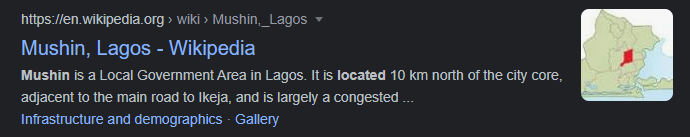

### 검색해보면 mushin은 Lagos 라고 나와서 바꿔주었습니다.

In [71]:
train = train.replace({
    'Abia State' : 'Abia',
    'Abuja ' : 'Abuja',
    'Lagos ' : 'Lagos',
    'Lagos State' : 'Lagos',
    'Ogun State' : 'Ogun'
    })

In [72]:
test = test.replace({
    'Abuja ' : 'Abuja',
    'Lagos ' : 'Lagos',
    'Lagos State' : 'Lagos',
    'Ogun State' : 'Ogun',
    'Arepo ogun state ' : 'Ogun',
    'Mushin' : 'Lagos',
})

In [73]:
print('------------- train -------------')
print(sorted(train.location.unique()))

print('\n\n------------- test -------------')
print(sorted(test.location.unique()))

------------- train -------------
['Abia', 'Abuja', 'Accra', 'Adamawa ', 'FCT', 'Lagos', 'Ogun', 'other']


------------- test -------------
['Abia', 'Abuja', 'Lagos', 'Ogun', 'other']


# 'engine' Column

In [74]:
print('------------- train -------------')
print(sorted(train.engine.unique()))

print('\n\n------------- test -------------')
print(sorted(test.engine.unique()))

------------- train -------------
['2-cylinder(I2)', '3-cylinder(I3)', '4-cylinder(H4)', '4-cylinder(I4)', '5-cylinder(I5)', '6-cylinder(I6)', '6-cylinder(V6)', '8-cylinder(V8)']


------------- test -------------
['12-cylinder(V12)', '2-cylinder(I2)', '3-cylinder(I3)', '4-cylinder(I4)', '5-cylinder(I5)', '6-cylinder(I6)', '6-cylinder(V6)', '8-cylinder(V8)']


In [75]:
test[(test.engine == '12-cylinder(V12)')]

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
142,Mercedes-Benz Maybach,6758,Lagos,New,12-cylinder(V12),automatic,petrol,Black,2019,320


In [76]:
engine_re = train[['engine', 'target']].groupby(['engine'], as_index=False).mean().sort_values(by='target', ascending=False,ignore_index=True)
engine_re

,engine,target
0,8-cylinder(V8),2.280010e+07
1,4-cylinder(H4),1.139000e+07
2,6-cylinder(V6),7.989856e+06
3,6-cylinder(I6),7.841907e+06
4,4-cylinder(I4),7.294036e+06
5,5-cylinder(I5),3.815000e+06
6,3-cylinder(I3),3.138333e+06
7,2-cylinder(I2),3.015000e+06


In [77]:
train = train.replace({
    '2-cylinder(I2)' : 10,
    '3-cylinder(I3)' : 20,
    '5-cylinder(I5)' : 30,
    '4-cylinder(I4)' : 40,
    '6-cylinder(I6)' : 50,
    '6-cylinder(V6)' : 60,
    '4-cylinder(H4)' : 70,
    '8-cylinder(V8)' : 80,
    '12-cylinder(V12)' : 90,
})

test = test.replace({
    '2-cylinder(I2)' : 10,
    '3-cylinder(I3)' : 20,
    '5-cylinder(I5)' : 30,
    '4-cylinder(I4)' : 40,
    '6-cylinder(I6)' : 50,
    '6-cylinder(V6)' : 60,
    '4-cylinder(H4)' : 70,
    '8-cylinder(V8)' : 80,
    '12-cylinder(V12)' : 90,
})

### 엔진의 등급을 살려주고 싶어서, 따로 숫자를 준다음에 Numeric 데이터로 학습시켜 보았습니다.

# Other Columns

In [78]:
print('------------- train -------------')
print(sorted(train.isimported.unique()))

print('\n\n------------- test -------------')
print(sorted(test.isimported.unique()))

------------- train -------------
['Foreign Used', 'Locally used', 'New ']


------------- test -------------
['Foreign Used', 'Locally used', 'New ']


In [79]:
print('------------- train -------------')
print(sorted(train.transmission.unique()))

print('\n\n------------- test -------------')
print(sorted(test.transmission.unique()))

------------- train -------------
['automatic', 'manual']


------------- test -------------
['automatic', 'manual']


In [80]:
print('------------- train -------------')
print(sorted(train.fuel.unique()))

print('\n\n------------- test -------------')
print(sorted(test.fuel.unique()))

------------- train -------------
['diesel', 'petrol']


------------- test -------------
['diesel', 'petrol']


In [81]:
train.odometer.describe()

count      1015.000000
mean     116842.121182
std      105162.545836
min           0.000000
25%       55918.000000
50%       94972.000000
75%      153224.000000
max      987322.000000
Name: odometer, dtype: float64

## 'paint' Column

In [82]:
sorted(train.paint.unique())

[' Black',
 ' Black/Red',
 'Ash',
 'Ash and black',
 'BLACK',
 'Beige',
 'Black',
 'Black ',
 'Black and silver',
 'Black sand pearl',
 'Black.',
 'Blue',
 'Blue ',
 'Brown',
 'Cream',
 'Cream ',
 'DARK GREY',
 'Dark Ash',
 'Dark Blue',
 'Dark Green',
 'Dark Grey',
 'Dark ash',
 'Dark blue ',
 'Dark gray',
 'Dark silver ',
 'Deep Blue',
 'Deep blue',
 'GOLD',
 'Gery',
 'Gold',
 'Gold ',
 'Gray',
 'Gray ',
 'Green',
 'Green ',
 'Grey',
 'Grey ',
 'Ink blue',
 'Light Gold',
 'Light blue',
 'Light silver ',
 'Magnetic Gray',
 'Magnetic Gray Metallic',
 'Maroon',
 'Midnight Black Metal',
 'Milk',
 'Navy blue',
 'Off white',
 'Off white l',
 'Pale brown',
 'Purple',
 'Red',
 'Redl',
 'SILVER',
 'Silver',
 'Silver ',
 'Silver/grey',
 'Sky blue',
 'Skye blue',
 'Sliver',
 'Super White',
 'WHITE',
 'WINE',
 'Whine ',
 'White',
 'White ',
 'White orchild pearl',
 'Wine',
 'Yellow',
 'blue',
 'green',
 'orange',
 'red',
 'white',
 'white-blue',
 'yellow']

In [83]:
sorted(test.paint.unique())

['  Brown',
 'Ash',
 'BLACK',
 'Beige',
 'Blac',
 'Black',
 'Black ',
 'Blue',
 'Blue ',
 'Brown',
 'Classic Silver Met(1F7)',
 'Cream',
 'Cream ',
 'Dark Ash',
 'Dark Blue',
 'Dark Green',
 'Dark Grey',
 'Dark blue ',
 'GOLD',
 'Gold',
 'Gold ',
 'Golf',
 'Gray',
 'Green',
 'Green ',
 'Grey',
 'Grey ',
 'Grey and black',
 'Indigo ink pearl',
 'Light Grey',
 'Maroon',
 'Mint green',
 'Navy blue',
 'Red',
 'Silver',
 'Silver ',
 'Sliver',
 'Sliver ',
 'White',
 'White and green',
 'Wine',
 'Yellow',
 'black',
 'blue',
 'green',
 'white']

In [84]:
import re 

def clean_text(texts): 
    corpus = [] 
    for i in range(0, len(texts)): 
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>\<]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
        review = re.sub(r'\d+','',review)#숫자 제거
        review = review.lower() #소문자 변환
        review = re.sub(r'\s+', ' ', review) #extra space 제거
        review = re.sub(r'<[^>]+>','',review) #Html tags 제거
        review = re.sub(r'\s+', ' ', review) #spaces 제거
        review = re.sub(r"^\s+", '', review) #space from start 제거
        review = re.sub(r'\s+$', '', review) #space from the end 제거
        review = re.sub(r'_', ' ', review) #space from the end 제거
        #review = re.sub(r'l', '', review)
        corpus.append(review) 
        
    return corpus

temp = clean_text(train['paint']) #메소드 적용
train['paint'] = temp
print('train data에서 paint의 unique 카테고리 개수 : ', len(train['paint'].unique()))

train data에서 paint의 unique 카테고리 개수 :  51


In [85]:
temp2 = clean_text(test['paint'])
test['paint'] = temp2
print('test data에서 paint의 unique 카테고리 개수 : ', len(test['paint'].unique()))

test data에서 paint의 unique 카테고리 개수 :  30


In [86]:
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)


test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'black' if x.find('blac') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)


In [87]:
print('train data에서 paint의 unique 카테고리 개수 : ', len(train['paint'].value_counts()))

train data에서 paint의 unique 카테고리 개수 :  18


In [88]:
print('test data에서 paint의 unique 카테고리 개수 : ', len(test['paint'].value_counts()))

test data에서 paint의 unique 카테고리 개수 :  17


In [89]:
sorted(train.paint.unique())

['ash',
 'beige',
 'black',
 'blue',
 'brown',
 'cream',
 'gold',
 'green',
 'grey',
 'maroon',
 'milk',
 'orange',
 'purple',
 'red',
 'silver',
 'white',
 'wine',
 'yellow']

In [90]:
sorted(test.paint.unique())

['ash',
 'beige',
 'black',
 'blue',
 'brown',
 'cream',
 'gold',
 'golf',
 'green',
 'grey',
 'indigo ink pearl',
 'maroon',
 'red',
 'silver',
 'white',
 'wine',
 'yellow']

In [91]:
train = train.replace({
    'milk' : 'cream',
    'maroon' : 'red',
    'wine' : 'red',
})

test = test.replace({
    'indigo ink pearl' : 'blue',
    'golf' : 'green',
    'maroon' : 'red',
    'wine' : 'red',
})

In [92]:
print('train data에서 paint의 unique 카테고리 개수 : ', len(train['paint'].value_counts()))
print('test data에서 paint의 unique 카테고리 개수 : ', len(test['paint'].value_counts()))

train data에서 paint의 unique 카테고리 개수 :  15
test data에서 paint의 unique 카테고리 개수 :  13


In [93]:
sorted(train.paint.unique())

['ash',
 'beige',
 'black',
 'blue',
 'brown',
 'cream',
 'gold',
 'green',
 'grey',
 'orange',
 'purple',
 'red',
 'silver',
 'white',
 'yellow']

##  무채색 유채색 colum 만들기

### 개인적으로 중고차 가격에는 색이 튀는지, 안튀는지도 영향을 준다 생각해서, 유채색 무채색 컬럼을 만들어 봤습니다.

In [94]:
train['colorType'] = train['paint'].apply(lambda x:'chromatic' if x=='red' or x=='blue' or x=='brown' or x=='gold' or x=='green' or x=='orange' or x=='purple' or x=='yellow' else 'achromatic') #유채색 chromatic
test['colorType'] = test['paint'].apply(lambda x:'chromatic' if x=='red' or x=='blue' or x=='brown' or x=='gold' or x=='green' or x=='orange' or x=='purple' or x=='yellow' else 'achromatic') #유채색 chromatic

In [95]:
train

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType
0,Toyota RAV 4,18277,Lagos,Foreign Used,40,automatic,petrol,red,2016,13665000,240,chromatic
1,Toyota Land Cruiser,10,Lagos,New,40,automatic,petrol,black,2019,33015000,240,achromatic
2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,60,automatic,petrol,red,2012,9915000,390,chromatic
3,Lexus ES 350,91524,Lagos,Foreign Used,40,automatic,petrol,grey,2007,3815000,330,achromatic
4,Toyota Venza,94177,Lagos,Foreign Used,60,automatic,petrol,red,2010,7385000,240,chromatic
...,...,...,...,...,...,...,...,...,...,...,...,...
1010,Toyota Corolla,46768,Lagos,Foreign Used,40,automatic,petrol,black,2014,5415000,240,achromatic
1011,Toyota Camry,31600,Abuja,Foreign Used,40,automatic,petrol,silver,2011,3615000,240,achromatic
1012,Toyota Camry,96802,Abuja,Foreign Used,40,automatic,petrol,black,2011,3415000,240,achromatic
1013,Lexus GX 460,146275,Lagos,Foreign Used,60,automatic,petrol,gold,2013,14315000,330,chromatic


# 'year' Column

In [96]:
print('------------- train -------------')
print(sorted(train.year.unique()))

print('\n\n------------- test -------------')
print(sorted(test.year.unique()))

------------- train -------------
[1217, 1218, 1980, 1982, 1985, 1991, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


------------- test -------------
[1324, 1726, 1987, 1993, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2626]


In [97]:
train[(train.year == 1217) | (train.year == 1218)]

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType
415,Mercedes-Benz ATEGO,403461,Lagos,Locally used,40,manual,diesel,white,1218,6015000,320,achromatic
827,320,510053,Lagos,Locally used,60,manual,diesel,white,1217,75015000,320,achromatic


In [98]:
test[(test.title == 'Mercedes-Benz ATEGO')|(test.title == 'Mercedes-Benz/52')]

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand,colorType


In [99]:
test[(test.year == 1324) | (test.year == 1726)| (test.year == 2626)]

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand,colorType
304,Mercedes-Benz CABIN PLUS CHASSIS ONLY,650923,Lagos,Locally used,60,manual,diesel,blue,1324,320,chromatic
406,Mercedes-Benz DUMP TRUCK,0,Lagos,Locally used,80,manual,diesel,white,2626,320,achromatic
411,Mercedes-Benz WATER TANKER,701934,Lagos,Locally used,80,manual,diesel,white,1726,320,achromatic


In [100]:
train[(train.brand == 'Mercedes-Benz') & (train.odometer == 0)]

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType


In [101]:
train['year'] = train['year'].apply(lambda x:0 if x<1900 or x>2022 else x)
test['year'] = test['year'].apply(lambda x:0 if x<1900 or x>2022 else x)

In [102]:
print('------------- train -------------')
print(sorted(train.year.unique()))

print('\n\n------------- test -------------')
print(sorted(test.year.unique()))

------------- train -------------
[0, 1980, 1982, 1985, 1991, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


------------- test -------------
[0, 1987, 1993, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


# 가격 이상치

In [103]:
train[(train.target > 100000000)]

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType
341,Land Rover Range Rover Sport,18720,Lagos,Foreign Used,80,automatic,petrol,grey,2019,117015000,390,achromatic
569,Lexus LX 570,55530,Abuja,Foreign Used,80,automatic,petrol,black,2014,110015000,330,achromatic
597,Rolls-Royce Ghost,16069,Lagos,Locally used,40,automatic,petrol,black,2011,150015008,400,achromatic
736,Mercedes-Benz G 63 AMG,20,Lagos,New,80,automatic,petrol,black,2019,108690000,320,achromatic



레인지로버 스포츠는 117015000 나이라(나이지리아 돈) 은 한국돈으로 3억정도인데
실제 중고가가 1억정도니까 33015000로 바꾸었습니다.

마찬가리로 렉서스와 G63도 바꾸었습니다.

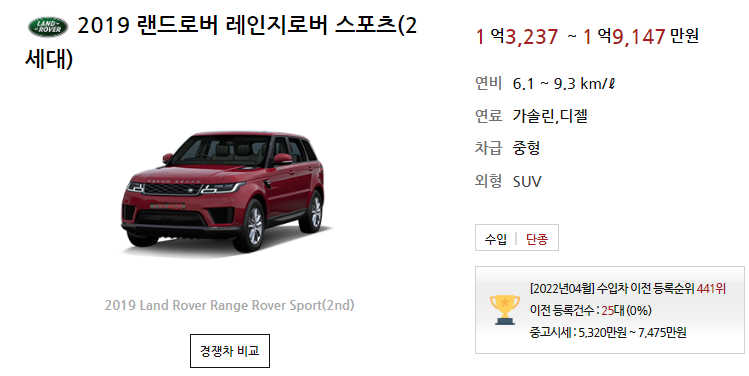

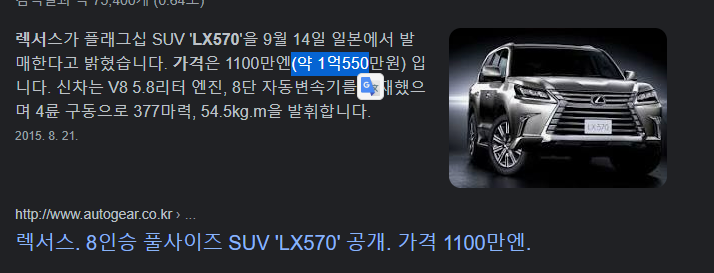

In [104]:
train.loc[341,'target'] = 33015000
train.loc[569,'target'] = 29015000
train.loc[736,'target'] = 60015000

## 정리

In [109]:
train['target'] = train['target'].apply(lambda x:np.log(x))

In [110]:
train

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType
0,Toyota RAV 4,18277,Lagos,Foreign Used,40,automatic,petrol,red,2016,16.430348,240,chromatic
1,Toyota Land Cruiser,10,Lagos,New,40,automatic,petrol,black,2019,17.312473,240,achromatic
2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,60,automatic,petrol,red,2012,16.109559,390,chromatic
3,Lexus ES 350,91524,Lagos,Foreign Used,40,automatic,petrol,grey,2007,15.154451,330,achromatic
4,Toyota Venza,94177,Lagos,Foreign Used,60,automatic,petrol,red,2010,15.814961,240,chromatic
...,...,...,...,...,...,...,...,...,...,...,...,...
1010,Toyota Corolla,46768,Lagos,Foreign Used,40,automatic,petrol,black,2014,15.504683,240,achromatic
1011,Toyota Camry,31600,Abuja,Foreign Used,40,automatic,petrol,silver,2011,15.100602,240,achromatic
1012,Toyota Camry,96802,Abuja,Foreign Used,40,automatic,petrol,black,2011,15.043688,240,achromatic
1013,Lexus GX 460,146275,Lagos,Foreign Used,60,automatic,petrol,gold,2013,16.476818,330,chromatic


In [111]:
test

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand,colorType
0,Mercedes-Benz C 300,1234,Abuja,New,40,automatic,petrol,white,2017,320,achromatic
1,Honda Accord,29938,Abuja,Foreign Used,40,automatic,petrol,white,2013,170,achromatic
2,Mercedes-Benz S 550,87501,Lagos,Foreign Used,40,automatic,petrol,black,2012,320,achromatic
3,Toyota Sienna,180894,Lagos,Locally used,60,automatic,petrol,grey,2001,240,achromatic
4,Toyota Hiace,104814,Lagos,Foreign Used,40,automatic,petrol,white,2000,240,achromatic
...,...,...,...,...,...,...,...,...,...,...,...
431,Mercedes-Benz GLK 350,78175,Lagos,Foreign Used,60,automatic,petrol,blue,2014,320,chromatic
432,Honda Crosstour,129223,Lagos,Foreign Used,60,automatic,petrol,red,2011,170,chromatic
433,Mercedes-Benz ML 350,100943,Lagos,Foreign Used,40,automatic,petrol,black,2013,320,achromatic
434,Lexus GX 470,81463,Lagos,Foreign Used,40,automatic,petrol,green,2003,330,chromatic


In [112]:
from sklearn.preprocessing import MinMaxScaler

# 수치형 데이터 상관관계 히트맵 시각화
train_corr = train[['brand','engine','odometer', 'year', 'target']]
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

/tmp/ipykernel_506609/3882356494.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])


Text(0.5, 1.0, 'Correlation between features')

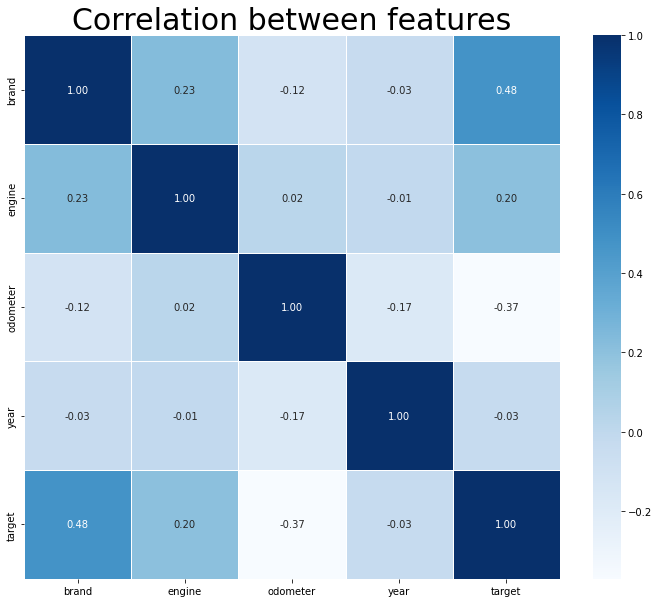

In [113]:
plt.figure(figsize=(12,10))
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation between features', fontsize=30)

# Auto ML

In [129]:
from pycaret.regression import *

reg_test_1 = setup(data=train,
                   target='target',
                   train_size= 0.85,
                   #test_data=test,
                   use_gpu =True,
                   normalize=True,
                   normalize_method ='minmax',
                   remove_perfect_collinearity=False,
                   numeric_features = ['engine','brand'],
                   fold=10,
                   session_id=42
                   )

,Description,Value
0,session_id,42
1,Target,target
2,Original Data,"(1015, 12)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(862, 225)"


In [130]:
best= compare_models(sort='mae',n_select=4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2248,0.1139,0.3322,0.8725,0.0202,0.0146,0.2480
rf,Random Forest Regressor,0.2420,0.1222,0.3444,0.8634,0.0208,0.0157,0.2550
gbr,Gradient Boosting Regressor,0.2449,0.1209,0.3416,0.8654,0.0207,0.0159,0.0950
lightgbm,Light Gradient Boosting Machine,0.2681,0.1396,0.3670,0.8443,0.0222,0.0174,0.0490
dt,Decision Tree Regressor,0.3009,0.1946,0.4350,0.7816,0.0263,0.0195,0.0120
ada,AdaBoost Regressor,0.3602,0.2106,0.4562,0.7609,0.0277,0.0235,0.0700
ridge,Ridge Regression,0.4419,0.3200,0.5629,0.6357,0.0341,0.0286,0.0060
br,Bayesian Ridge,0.4419,0.3203,0.5631,0.6355,0.0342,0.0286,0.0220
huber,Huber Regressor,0.4464,0.3800,0.6069,0.5736,0.0373,0.0289,0.0540
omp,Orthogonal Matching Pursuit,0.4682,0.3605,0.5980,0.5884,0.0363,0.0303,0.0050


In [131]:
best

[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=42, verbose=0, warm_start=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False),
 GradientBo

In [132]:
top5 = [rank for rank in best]
top5_tune = [tune_model(i) for i in top5]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2839,0.1284,0.3583,0.8926,0.0213,0.0181
1,0.3540,0.2853,0.5341,0.7350,0.0314,0.0225
2,0.3102,0.1655,0.4068,0.7717,0.0245,0.0200
3,0.2451,0.1283,0.3582,0.8237,0.0217,0.0160
4,0.2294,0.0992,0.3150,0.8622,0.0194,0.0149
5,0.2639,0.1122,0.3350,0.8938,0.0211,0.0175
6,0.2711,0.1398,0.3740,0.8484,0.0223,0.0174
7,0.2323,0.0877,0.2962,0.8734,0.0181,0.0152
8,0.2800,0.1443,0.3799,0.8553,0.0229,0.0180


In [133]:
blended = blend_models(estimator_list = best,
                       fold = 10,
                       #method = 'soft',
                       optimize='mae',
                       )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2361,0.0944,0.3072,0.9210,0.0184,0.0152
1,0.3055,0.2408,0.4908,0.7763,0.0288,0.0193
2,0.2289,0.1002,0.3165,0.8618,0.0191,0.0148
3,0.1975,0.1028,0.3206,0.8587,0.0193,0.0128
4,0.1945,0.0749,0.2737,0.8959,0.0167,0.0126
5,0.2138,0.0774,0.2782,0.9268,0.0176,0.0143
6,0.2312,0.1124,0.3353,0.8782,0.0201,0.0149
7,0.1833,0.0542,0.2327,0.9219,0.0144,0.0121
8,0.2668,0.1286,0.3586,0.8711,0.0216,0.0171


In [134]:
final_model = finalize_model(blended)

In [135]:
y_test = predict_model(final_model, data =test)
y_test = np.exp(y_test['Label'])

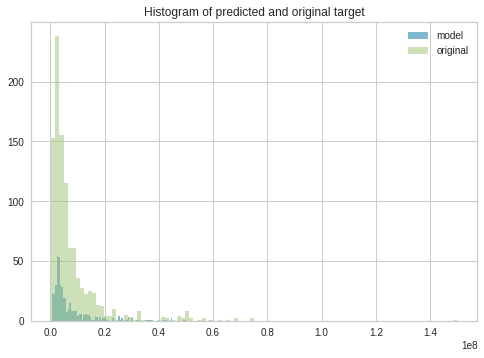

In [136]:
# histogram of scaled target
label_fix = np.exp(train.target) #*M_label
plt.hist(y_test, bins=100, label='model', alpha=0.5)
plt.hist(label_fix, bins=100, label='original', alpha=0.5)

plt.title('Histogram of predicted and original target')
plt.legend()
plt.show()

In [ ]:
submission = pd.read_csv('./sample_submission.csv')
submission['target'] = y_test
submission.to_csv('./submit/sub9.csv', index=False)